<a href="https://colab.research.google.com/github/prabirdeb/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# **Steps of Exploratory Data Analysis (EDA)**

**1. Data or EXPERIENCE**

Here, we are provided with a dataset with more than 180,000 terrorist attacks.

Thus, the dataset is actually a collection of more than 180,000 experiences about terrorist attacks. 

Now, we need to **decode the set of experiences** to help in building solid future strategies to fight against future attacks.

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib 
from matplotlib import rcParams

Using matplotlib backend: agg


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading the data as pandas dataframe
terror_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/Global Terrorism Analysis-Prabir Debnath/Global Terrorism Data.csv',encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**2. Features or "DHARMA":**

Here, the columns are the set of features, showing the way to reach final decoded experience or conclusions.  

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [4]:
terror_df.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


**3. Statistics or MEASUREMENTS**

As there is a huge no. of experiences, we take the help of statistics to **measure** each and every features in different dimensions and thus step by step, will find the most important features or the exact way to decode the experiences.

“**what gets measured gets done**“.

In [5]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
terror_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [7]:
for column_name in terror_df.columns:
  print(colored(f"Unique values for {column_name}:",'blue', attrs=['bold']))
  print(terror_df[column_name].unique())

Unique values for eventid:
[197000000001 197000000002 197001000001 ... 201712310030 201712310031
 201712310032]
Unique values for iyear:
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]
Unique values for imonth:
[ 7  0  1  2  3  4  5  6  8  9 10 11 12]
Unique values for iday:
[ 2  0  1  3  6  8  9 10 11 12 13 14 15 19 20 21 22 25 26 27 28 30 31  4
  7 16 17 18 23 24  5 29]
Unique values for approxdate:
[nan 'January 19-20, 1970' 'February 6-9, 1970' ... '2017-12-29 00:00:00'
 'December 25, 2017-January 5, 2018' '2017-12-31 00:00:00']
Unique values for extended:
[0 1]
Unique values for resolution:
[nan '3/8/1970' '3/15/1970' ... '3/23/2013' '12/9/2011' '12/27/2011']
Unique values for country:
[  58  130  160   78  101  217  218   98  499   65   83  222  362  199
  102  185   30   60   11  110   96  

In [8]:
for column_name in terror_df.columns:
  print(colored(f"No. of unique values for {column_name}:",'green', attrs=['bold']))
  print(terror_df[column_name].nunique())

No. of unique values for eventid:
181691
No. of unique values for iyear:
47
No. of unique values for imonth:
13
No. of unique values for iday:
32
No. of unique values for approxdate:
2244
No. of unique values for extended:
2
No. of unique values for resolution:
1859
No. of unique values for country:
205
No. of unique values for country_txt:
205
No. of unique values for region:
12
No. of unique values for region_txt:
12
No. of unique values for provstate:
2855
No. of unique values for city:
36674
No. of unique values for latitude:
48322
No. of unique values for longitude:
48039
No. of unique values for specificity:
5
No. of unique values for vicinity:
3
No. of unique values for location:
44109
No. of unique values for summary:
112492
No. of unique values for crit1:
2
No. of unique values for crit2:
2
No. of unique values for crit3:
2
No. of unique values for doubtterr:
3
No. of unique values for alternative:
5
No. of unique values for alternative_txt:
5
No. of unique values for multiple

In [9]:
for column_name in terror_df.columns:
  print(colored(f"No. of null values for {column_name}:",'magenta', attrs=['bold']))
  print(terror_df[column_name].isnull().sum())

No. of null values for eventid:
0
No. of null values for iyear:
0
No. of null values for imonth:
0
No. of null values for iday:
0
No. of null values for approxdate:
172452
No. of null values for extended:
0
No. of null values for resolution:
179471
No. of null values for country:
0
No. of null values for country_txt:
0
No. of null values for region:
0
No. of null values for region_txt:
0
No. of null values for provstate:
421
No. of null values for city:
434
No. of null values for latitude:
4556
No. of null values for longitude:
4557
No. of null values for specificity:
6
No. of null values for vicinity:
0
No. of null values for location:
126196
No. of null values for summary:
66129
No. of null values for crit1:
0
No. of null values for crit2:
0
No. of null values for crit3:
0
No. of null values for doubtterr:
1
No. of null values for alternative:
152680
No. of null values for alternative_txt:
152680
No. of null values for multiple:
1
No. of null values for success:
0
No. of null values 

In [10]:
# Finding out the final important columns considering type of unique values, less no. of unique values and less no. of null values
important_columns=['iyear','country_txt','region_txt','success','suicide','attacktype1_txt','targtype1_txt','targsubtype1_txt',
                         'natlty1_txt','gname','weaptype1_txt','nkill','nkillus','nkillter','nwound','nwoundus',
                         'nwoundte']

**4. Data Cleaning**

Now we can create a clean experience set with important features. 

In this step, we treat the missing values or "?" values through imputation if required.

If there is any string containing a Python literal in any of the important feature, we must evaluate them

We may also create new feature if found important during the analysis.

We check the statistics further on clean data.

In [11]:
terror_df=terror_df[important_columns]

In [12]:
for column_name in terror_df.columns:
  print(colored(f"Value counts for {column_name}:", attrs=['bold']))
  print(terror_df[column_name].value_counts())

Value counts for iyear:
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64
Value counts for country_txt:
Iraq                24636
Pakistan            14368
Afghanistan         12731
India               11960
Colombia             8306
                    ...  
North Korea             1
Falkland Islands        1
International           1
St. Lucia               1
An

In [51]:
text_columns=['country_txt','region_txt','attacktype1_txt','targtype1_txt','targsubtype1_txt','gname','weaptype1_txt']

In [52]:
terror_text_df=terror_df[text_columns]

In [53]:
# Renaming columns
terror_text_df.columns=['countries','region','attack_type','target_type','target_subtype','gang_name','weapon_type']

In [55]:
num_columns=['nkill','nkillus','nkillter','nwound','nwoundus','nwoundte']

In [56]:
terror_num_df=terror_df[num_columns]

**5. Data Visualization**

When we know all the important features of our experiences, we can go a step ahead by finding the relationship among features. Here, we take the help of visualization because

**"A picture is worth a thousand words"**

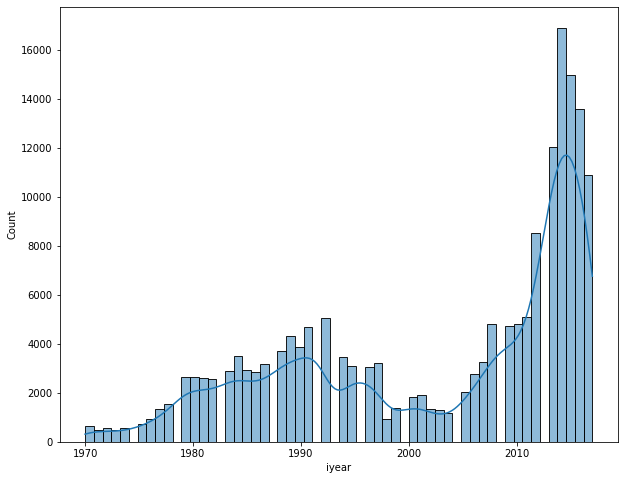

In [15]:
plt.figure(figsize=(10,8))
sns.histplot(x='iyear',data=terror_df,kde=True)
plt.show()

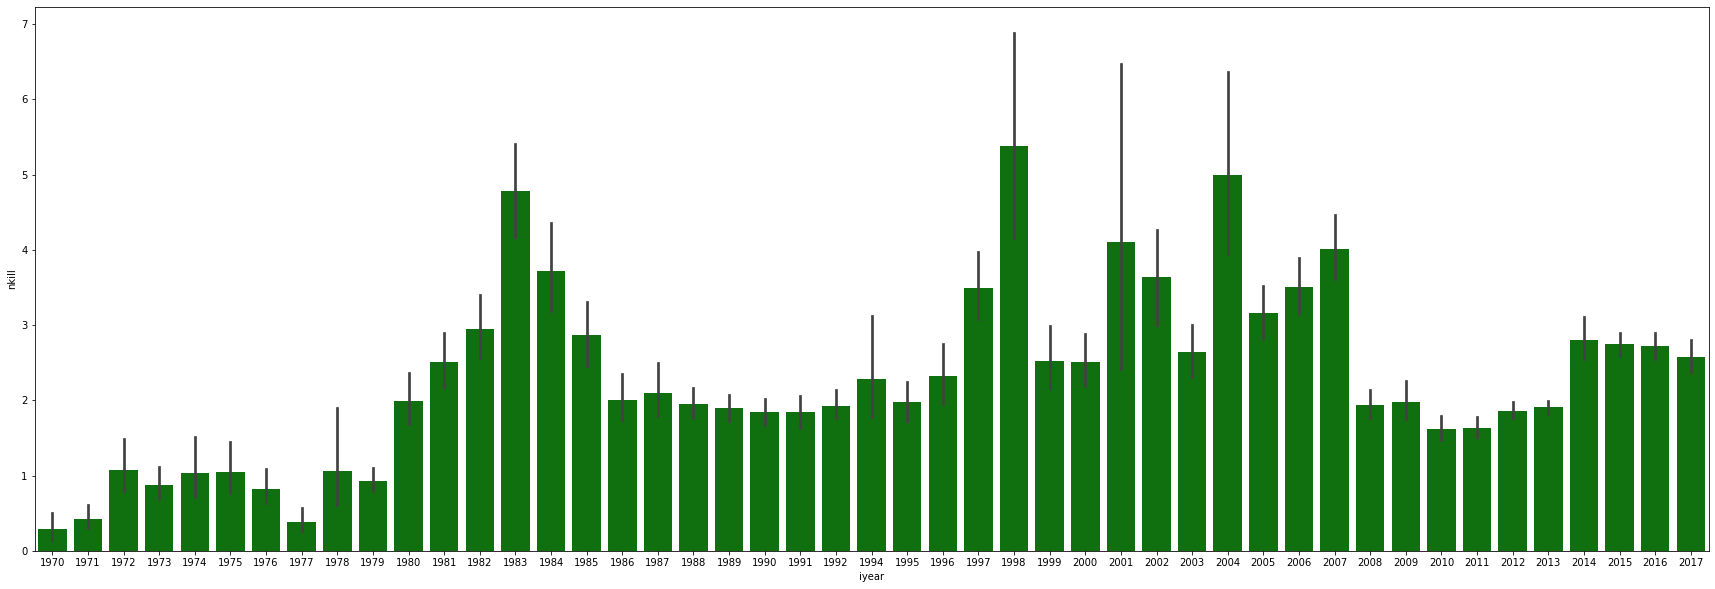

In [18]:
sns.barplot(x='iyear', y='nkill', data=terror_df, color='g')
plt.show()

**6. Anomaly Detection**

While, we are finding out the **general formula** from the experiences, we should identify the outlier or **exceptional observations** for all the important features and keep them aside during the analysis.

Here, anomalies are not affecting out analysis to reach final conclusion

**7. Conclusion**


**Summary from the text data**

In [54]:
for column_name in terror_text_df.columns:
  print(colored(f"Top five {column_name} in percentage:", attrs=['bold']))
  print(round(terror_text_df[column_name].value_counts()[:5]*100/terror_text_df[column_name].value_counts().sum(),2))

Top five countries in percentage:
Iraq           13.56
Pakistan        7.91
Afghanistan     7.01
India           6.58
Colombia        4.57
Name: countries, dtype: float64
Top five region in percentage:
Middle East & North Africa    27.78
South Asia                    24.75
South America                 10.45
Sub-Saharan Africa             9.66
Western Europe                 9.16
Name: region, dtype: float64
Top five attack_type in percentage:
Bombing/Explosion                 48.57
Armed Assault                     23.48
Assassination                     10.63
Hostage Taking (Kidnapping)        6.14
Facility/Infrastructure Attack     5.70
Name: attack_type, dtype: float64
Top five target_type in percentage:
Private Citizens & Property    23.95
Military                       15.40
Police                         13.49
Government (General)           11.71
Business                       11.38
Name: target_type, dtype: float64
Top five target_subtype in percentage:
Unnamed Civilian/Unspecif

**Summary from the numeric data**

In [64]:
terror_num_df.describe()

,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte
count,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000
mean,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163
std,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,1570.000000,1360.000000,500.000000,8191.000000,751.000000,200.000000


**i. There is a clear increasing trend in terrorist attacks from 1970 to 2017**

**ii. Attacks are mainly on Private Citizens & Property through Bombing/Explosion**

**iii. Most affected regions are Middle East & North Africa, South Asia (Iraq, Pakistan, Afghanistan, India, Colombia)**